In [6]:
from sklearn.datasets import load_digits 
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

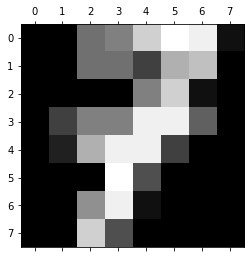

In [8]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[7]) 
plt.show()

In [9]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.6, shuffle=False)


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       105
           1       0.96      0.98      0.97       110
           2       0.97      0.96      0.97       105
           3       0.98      0.89      0.93       109
           4       0.99      0.95      0.97       111
           5       0.94      0.97      0.95       109
           6       0.99      0.97      0.98       109
           7       0.96      0.99      0.98       108
           8       0.94      0.88      0.91       104
           9       0.88      0.98      0.93       109

    accuracy                           0.96      1079
   macro avg       0.96      0.96      0.96      1079
weighted avg       0.96      0.96      0.96      1079



Confusion matrix:
[[104   0   0   0   1   0   0   0   0   0]
 [  0 108   1   0   0   1   0   0   0   0]
 [  1   0 101   1   0   0   0   1   0   1]
 [  0   0   0  97   0   3   0   3   

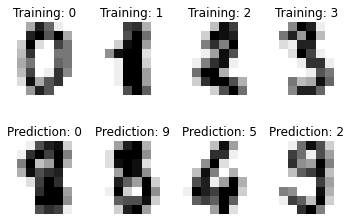

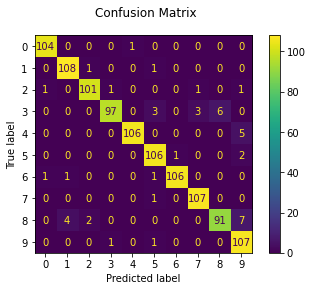

In [11]:
#svm 
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       105
           1       0.68      0.55      0.61       110
           2       0.79      0.64      0.71       105
           3       0.68      0.72      0.70       109
           4       0.76      0.74      0.75       111
           5       0.64      0.72      0.68       109
           6       0.87      0.72      0.79       109
           7       0.83      0.79      0.81       108
           8       0.51      0.63      0.57       104
           9       0.56      0.59      0.57       109

    accuracy                           0.71      1079
   macro avg       0.71      0.71      0.71      1079
weighted avg       0.71      0.71      0.71      1079



Confusion matrix:
[[102   0   0   0   3   0   0   0   0   0]
 [  3  60   2   0   8   8   3   0  15  11]
 [  3   3  67   7   0   0   0   2  18   5]
 [  0   4   1  79   1   4   

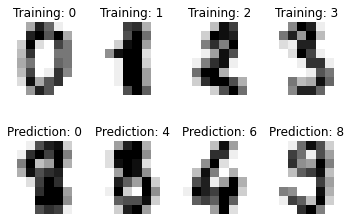

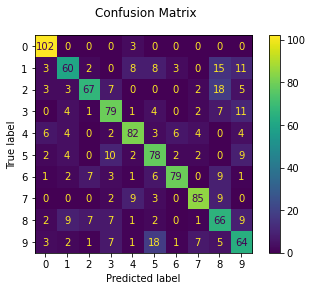

In [12]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()